In [10]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
import mdtraj as md

pld_crys = md.load('2PLD/2PLD_crys.pdb')
pld_pred = md.load('2PLD/2PLD_af_main.pdb')

pld_crys = crys.atom_slice(crys.topology.select('backbone'))
pld_pred = pred.atom_slice(pred.topology.select('backbone'))

pld_rmsd = md.rmsd(target = pred, reference=crys)
print(rmsd)

0.045909718


/Users/sudarshand/opt/anaconda3/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [30]:
def compute_by_residue_rmsd(crys_file, pred_file):
    """
    Compute the by-residue RMSD between two structures.

    Parameters:
    crys_file (str): File path to the crystal structure.
    pred_file (str): File path to the predicted structure.

    Returns:
    list of tuples: Each tuple contains (residue_index, rmsd_value)
    """
    # Load the structures
    crys = md.load(crys_file)
    pred = md.load(pred_file)

    # Slice to keep only backbone atoms
    crys_backbone = crys.atom_slice(crys.topology.select('backbone'))
    pred_backbone = pred.atom_slice(pred.topology.select('backbone'))

    # Superpose the predicted structure onto the crystal structure for alignment
    pred_backbone.superpose(crys_backbone)

    # Initialize an empty list to store RMSD values for each residue
    rmsd_per_residue = []

    # Iterate over the residues
    for residue in crys_backbone.topology.residues:
        # Select atoms in this residue from both structures
        indices = crys_backbone.topology.select(f'residue {residue.index} and backbone')

        # If indices are empty (no backbone atoms), skip to next residue
        if len(indices) == 0:
            continue

        # Compute RMSD for the current residue and add it to the list
        residue_rmsd = md.rmsd(target=pred_backbone, reference=crys_backbone, atom_indices=indices)
        rmsd_per_residue.append((residue.index, residue_rmsd[0]))

    return rmsd_per_residue

rmsd_values_pld = compute_by_residue_rmsd('2PLD/2PLD_crys.pdb', '2PLD/2PLD_af_main.pdb')


# for res_index, rmsd in rmsd_values_pld:
#     print(f'Residue {res_index+1}: RMSD = {rmsd:.3f} nm')

pld_df= pd.DataFrame(columns=['Residue', 'RMSD'])

for res_index, rmsd in rmsd_values_pld:
    # Create a DataFrame for the current row and concatenate it
    row_df = pd.DataFrame({'Residue': [res_index + 1], 'RMSD': [rmsd]})
    pld_df = pd.concat([pld_df, row_df], ignore_index=True)

pld_df.set_index('Residue')

/Users/sudarshand/opt/anaconda3/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


,RMSD
Residue,
2,0.543364
3,0.323743
4,0.207046
5,0.200411
6,0.141982
...,...
102,0.061497
103,0.004277
104,0.002032


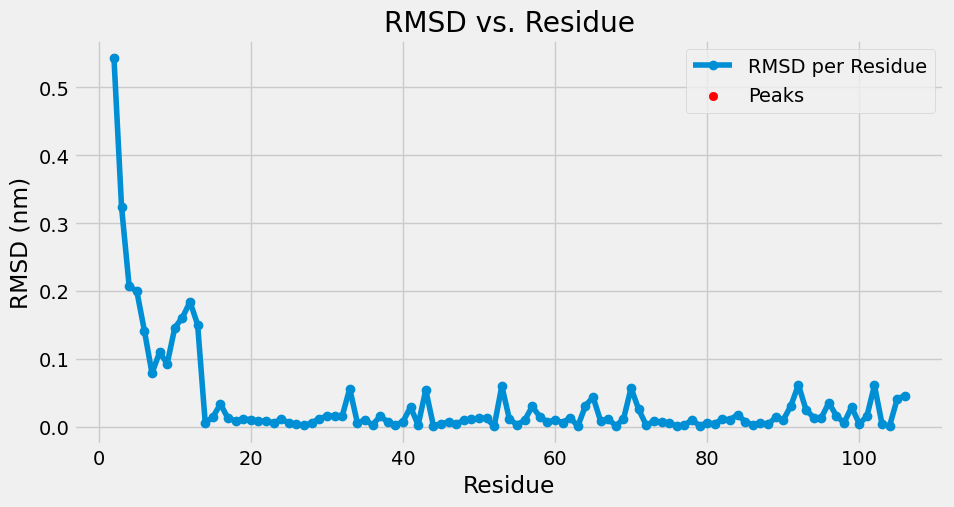

In [32]:
def plot_rmsd_with_peaks(rmsd_values, peptide_end=None, protein_start=None, threshold=0.1):
    """
    Plots RMSD vs. Residue and identifies peaks.

    Parameters:
    rmsd_values (list of tuples): Each tuple contains (residue_index, rmsd_value).
    peptide_end (int, optional): The last residue index of the peptide.
    protein_start (int, optional): The first residue index of the protein.
    threshold (float): Threshold for identifying peaks in RMSD.
    """
    # Unzip the tuples to separate lists
    residue_indices, rmsds = zip(*rmsd_values)

    # Convert to numpy arrays for easier processing
    residue_indices = np.array(residue_indices)
    rmsds = np.array(rmsds)

    # Plot RMSD vs. Residue
    plt.figure(figsize=(10, 5))
    plt.plot(residue_indices + 1, rmsds, label='RMSD per Residue', marker='o')
    plt.xlabel('Residue')
    plt.ylabel('RMSD (nm)')
    plt.title('RMSD vs. Residue')
    plt.grid(True)

    # Identify and mark peaks
    peaks = (rmsds > np.roll(rmsds, 1)) & (rmsds > np.roll(rmsds, -1)) & (rmsds > threshold)
    plt.scatter(residue_indices[peaks] + 1, rmsds[peaks], color='red', label='Peaks')

    # Plot boundaries for peptide and protein, if specified
    if peptide_end is not None:
        plt.axvline(x=peptide_end, color='green', linestyle='--', label='Peptide End')
    if protein_start is not None:
        plt.axvline(x=protein_start, color='blue', linestyle='--', label='Protein Start')

    plt.legend()
    plt.show()

# Example usage
# Assume compute_by_residue_rmsd is already defined and has been used to calculate rmsd_values
plot_rmsd_with_peaks(rmsd_values_pld)

In [38]:
ple_crys = md.load('2ple/2ple_crys.pdb')
ple_pred = md.load('2ple/2ple_af_main.pdb')

/Users/sudarshand/opt/anaconda3/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


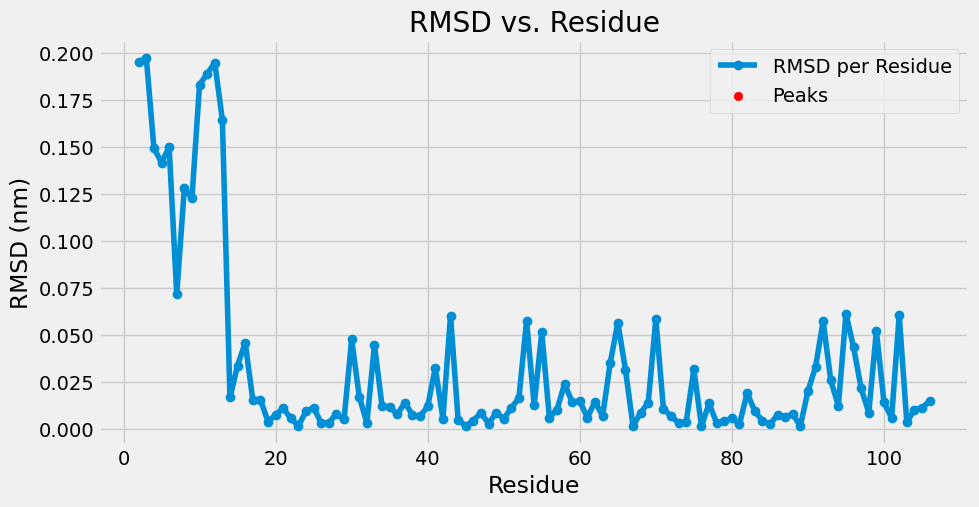

In [40]:
rmsd_values_ple = compute_by_residue_rmsd('2ple/2ple_crys.pdb','2ple/2ple_af_main.pdb' )
plot_rmsd_with_peaks(rmsd_values_ple)


In [43]:
rmsd_values_4k45 = compute_by_residue_rmsd('4k45/4k45_crys.pdb','4k45/4k45_af_main.pdb' )
plot_rmsd_with_peaks(rmsd_values_4k45)


ValueError: Input arrays must have same number of atoms. found 440 and 496.